In [1]:
from utils import Trainer
from language_model_utils import TimeMachineData
from RNN import RNN, RNNLM, LSTM, StackedGRU, BiStackedGRU

In [2]:
data = TimeMachineData(batch_size=1024, num_steps=32)
trainer = Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)

Final Train Loss: 2.1805


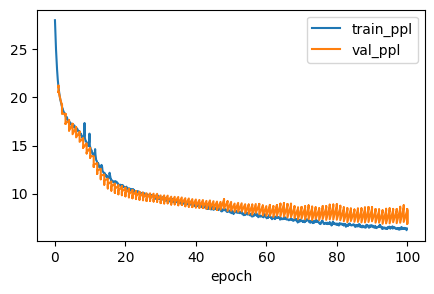

In [3]:
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
trainer.fit(model, data)

Final Train Loss: 1.9030


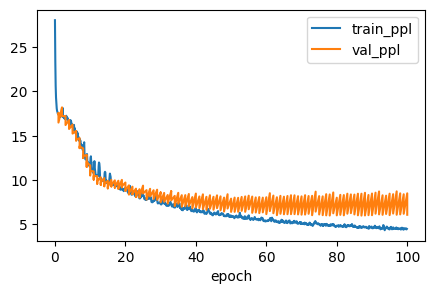

In [4]:
lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

Final Train Loss: 2.0172


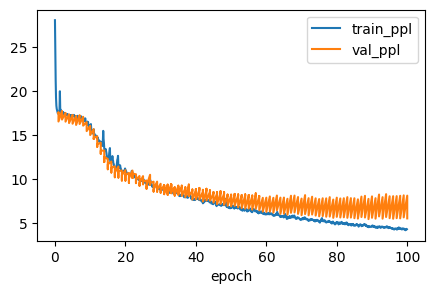

In [3]:
rnn_block = StackedGRU(num_inputs=len(data.vocab), num_hiddens=32, num_layers=2)
model = RNNLM(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer.fit(model, data)

Final Train Loss: 0.3501


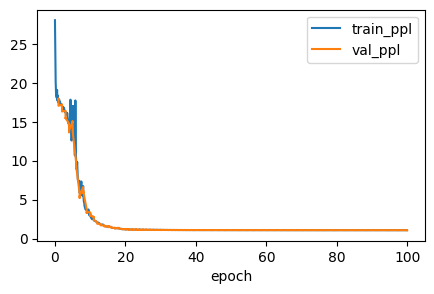

In [3]:
rnn_block = BiStackedGRU(num_inputs=len(data.vocab), num_hiddens=32, num_layers=2)
model = RNNLM(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer.fit(model, data)

# Sequence to Sequence Models

In [1]:
from seq2seq_models import *
from language_model_utils import MTFraEng, bleu
from utils import Trainer

Final Train Loss: 0.9415


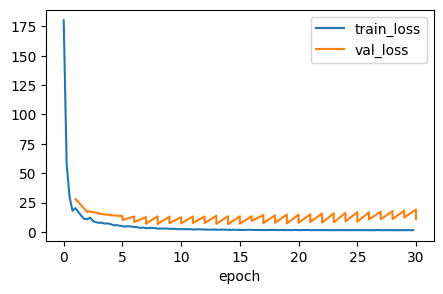

In [2]:
data = MTFraEng(batch_size=128)
embed_size, num_hiddens, num_layers, dropout = 256, 256, 2, 0.2
encoder = Seq2SeqEncoder(
    len(data.src_vocab), embed_size, num_hiddens, num_layers, dropout)
decoder = Seq2SeqDecoder(
    len(data.tgt_vocab), embed_size, num_hiddens, num_layers, dropout)
model = Seq2Seq(encoder, decoder, tgt_pad=data.tgt_vocab['<pad>'],
                lr=0.005)
trainer = Trainer(max_epochs=30, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [3]:
import torch

engs = ['go .', 'i lost .', 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']
device = "cuda" if torch.cuda.is_available() else "cpu"
preds, _ = model.predict_step(
    data.build(engs, fras), device, data.num_steps)
for en, fr, p in zip(engs, fras, preds):
    translation = []
    for token in data.tgt_vocab.to_tokens(p):
        if token == '<eos>':
            break
        translation.append(token)
    print(f'{en} => {translation}, bleu,'
          f'{bleu(" ".join(translation), fr, k=2):.3f}')

go . => ['<unk>', '.'], bleu,0.000
i lost . => ["j'ai", 'perdu', '.'], bleu,1.000
he's calm . => ['<unk>', '<unk>', '.'], bleu,0.000
i'm home . => ['je', 'suis', '<unk>', '.'], bleu,0.512
